<a href="https://colab.research.google.com/github/neelindresh/OmdenaMarsSurface/blob/master/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!rm -r OmdenaMarsSurface/

In [0]:
!git clone https://github.com/neelindresh/OmdenaMarsSurface.git

Cloning into 'OmdenaMarsSurface'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 18 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [0]:
!ls OmdenaMarsSurface/DataSet/

pia21454.jpg  pia22241-1041.jpg  pia22587.jpg


In [4]:
from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt

In [5]:
image = cv2.imread('Images/ESP_059712_2245.jpg',cv2.COLOR_BGR2GRAY)
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

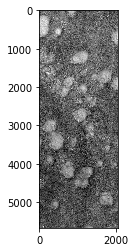

In [6]:
plt.imshow(image,cmap='gray')

In [7]:
imgboth = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

NameError: name 'sobelx' is not defined

In [8]:
def findEdges(image,kernal=None):
  if kernal==None:
    kernal=9
  sobelx = cv2.Sobel(image,cv2.CV_64F,2,0,ksize=kernal)
  sobelx = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=kernal)
  return sobelx,sobelx

In [9]:
def clusterImages(image,n_segments=50,compactness=10,sigma=1,markers=250,marker_compact=0.1):
  from skimage.data import astronaut
  from skimage.color import rgb2gray
  from skimage.segmentation import  slic, watershed
  from skimage.segmentation import mark_boundaries
  from skimage.util import img_as_float
  segments_slic = slic(image, n_segments=n_segments, compactness=compactness, sigma=sigma)
  gradient = sobel(rgb2gray(image))
  segments_watershed = watershed(gradient, markers=markers, compactness=marker_compact)
  print('SLIC number of segments: {}'.format(len(np.unique(segments_slic))))
  markImage=mark_boundaries(image,segments_slic)
  return markImage

In [22]:
def combineEdge(ximg,yimg):
  imgboth = cv2.addWeighted(ximg, 0.5, yimg, 0.5, 0)
  return imgboth

In [37]:
ximag,yimg=findEdges(image,kernal=11)

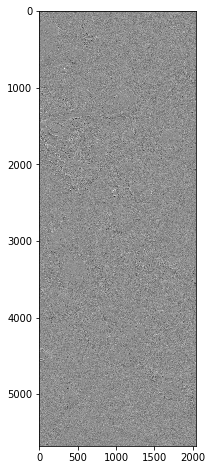

In [38]:
plt.figure(figsize=(16,8))
plt.imshow(ximag,cmap='gray')

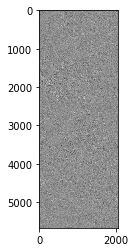

In [39]:
plt.imshow(yimg,cmap='gray')

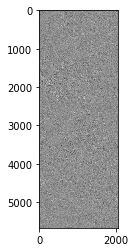

In [40]:
plt.imshow(combineEdge(ximag,yimg),cmap='gray')

In [41]:
combineEdge(ximag,yimg)

array([[       0.,        0.,        0., ...,        0.,        0.,
               0.],
       [ -353470.,  -686359., -1469513., ...,  -496463.,  -664404.,
         -754610.],
       [ -638372., -1004061., -1854086., ...,  -632211.,  -706454.,
         -767650.],
       ...,
       [-2212970., -2109050., -1666311., ...,   552034.,   405834.,
          263266.],
       [-1936992., -1866871., -1559469., ...,  -185855.,  -244033.,
         -320746.],
       [       0.,        0.,        0., ...,        0.,        0.,
               0.]])

In [42]:
cv2.imwrite('new.jpg',combineEdge(ximag,yimg))

True

In [43]:
cv2.imwrite('sobelx.jpg',ximag)
cv2.imwrite('sobely.jpg',yimg)

True

In [51]:
ximag.ndim

2

In [44]:
import torch